In [3]:
pip install nsepy

Note: you may need to restart the kernel to use updated packages.


In [35]:
import nsepy
import datetime
import pandas as pd

In [36]:
now = datetime.datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time)

22:10:29


In [37]:
def gethdata(stockname):
    today=datetime.date.today()
    duration=450
    start=today+datetime.timedelta(-duration)
    stockdata=nsepy.get_history(symbol=stockname,start=start,end=today)
    return stockdata
df=gethdata('SBIN')

In [38]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-10-24,SBIN,EQ,275.45,276.00,277.65,248.65,263.05,262.50,266.02,63943183,1.700998e+15,434945,13170984,0.2060
2019-10-25,SBIN,EQ,262.50,265.80,284.15,263.55,282.35,281.55,276.42,105518180,2.916686e+15,598440,15046974,0.1426
2019-10-27,SBIN,EQ,281.55,284.95,284.95,280.25,281.30,281.80,282.94,12185529,3.447724e+14,98481,3169728,0.2601
2019-10-29,SBIN,EQ,281.80,283.15,285.00,278.55,280.80,280.65,282.21,51033578,1.440228e+15,272560,16607377,0.3254
2019-10-30,SBIN,EQ,280.65,283.00,291.00,279.25,290.40,289.90,286.86,51469048,1.476427e+15,306035,15135958,0.2941


In [39]:
sd=df[['Prev Close','High','Deliverable Volume','VWAP']]

In [52]:
sd.loc[sd['Prev Close'] <= sd['High'], 'Result'] = 1
sd.loc[sd['Prev Close'] > sd['High'], 'Result'] = 0
    

C:\Users\tarun\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [85]:
sd


,Prev Close,High,Deliverable Volume,VWAP,Result
Date,,,,,
2019-10-24,275.45,277.65,13170984,266.02,1
2019-10-25,262.50,284.15,15046974,276.42,1
2019-10-27,281.55,284.95,3169728,282.94,1
2019-10-29,281.80,285.00,16607377,282.21,1
2019-10-30,280.65,291.00,15135958,286.86,1
...,...,...,...,...,...
2021-01-11,286.00,288.20,8900394,282.50,1
2021-01-12,282.50,293.85,14782759,286.89,1
2021-01-13,292.50,308.00,15723571,301.17,1


In [86]:
scores=sd[['Prev Close','High']].values
results=sd['Result'].values

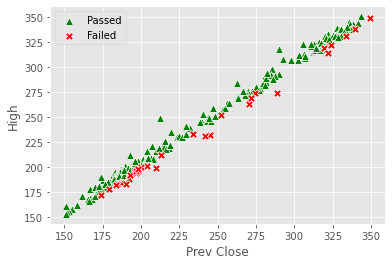

In [87]:
passed=(results==1).reshape(310,1)
failed=(results==0).reshape(310,1)
ax=sns.scatterplot(x=scores[passed[:,0],0],y=scores[passed[:,0],1],marker="^",
                   color='green',s=60)
sns.scatterplot(x=scores[failed[:,0],0],y=scores[failed[:,0],1],marker="X",
                   color='red',s=60)
ax.set(xlabel='Prev Close',ylabel='High')
ax.legend(['Passed','Failed'])

plt.show();

In [109]:
def logistic_function(x):
    
    return 1/(1+np.exp(-x))

In [120]:
logistic_function(0.03

0.5074994375506203

#### def compute_cost(theta,x,y):
    m=len(y)
    y_pred=logistic_function(np.dot(x,theta))
    error=(y*np.log(y_pred))+(1-y)*np.log(1-y_pred)
    cost=-(1/m)*sum(error)
    gradient=1/m*np.dot(x.transpose(),(y_pred-y))
    return cost[0],gradient 

In [112]:
mean_scores=np.mean(scores,axis=0)
std_scores=np.std(scores,axis=0)
scores=(scores-mean_scores)/std_scores
rows=scores.shape[0]
cols=scores.shape[1]
X=np.append(np.ones((rows,1)),scores,axis=1)
y=results.reshape(rows,1)
theta_init=np.zeros((cols+1,1))
cost,gradient=compute_cost(theta_init,X,y)
print('Cost at initialization',cost)
print('Gradient at initialization',gradient)

Cost at initialization 0.6931471805599467
Gradient at initialization [[-0.4]
 [-0.005859940803663947]
 [-0.01872894895752999]]


In [113]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient=compute_cost(theta,x,y)
        theta=theta-(alpha*gradient)
        costs.append(cost)
    return theta,costs

In [114]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [69]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.title("Values of cost function over iterations of gradient descent")

NameError: name 'costs' is not defined